<a href="https://colab.research.google.com/github/saifulislamsarfaraz/Machine-Learning/blob/main/Final_term_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This data was collected with an interactive version of the Short Dark Triad (see Paulhus, D. L., & Jones, D. N. (2011, January). Introducing a short measure of the Dark Triad. Poster presented at the meeting of the Society for Personality and Social Psychology, San Antonio.).

Only participants who indicated that their answers were accurate and agreed to allow their data to be used for research are included.

The following items were rated on a five point scale with the labels: 1=disagree, 3=neutral, 5=agree

M1	It's not wise to tell your secrets.

M2	I like to use clever manipulation to get my way.

M3	Whatever it takes, you must get the important people on your side. 

M4	Avoid direct conflict with others because they may be useful in the future. 

M5	It’s wise to keep track of information that you can use against people later. 

M6	You should wait for the right time to get back at people. 

M7	There are things you should hide from other people because they don’t need to know.

M8	Make sure your plans benefit you, not others.

M9	Most people can be manipulated.

N1	People see me as a natural leader. 

N2	I hate being the center of attention.

N3	Many group activities tend to be dull without me.  

N4	I know that I am special because everyone keeps telling me so. 

N5	I like to get acquainted with important people. 

N6	I feel embarrassed if someone compliments me.

N7	I have been compared to famous people. 

N8	I am an average person.

N9	I insist on getting the respect I deserve.

P1	I like to get revenge on authorities.

P2	I avoid dangerous situations.

P3	Payback needs to be quick and nasty. 

P4	People often say I’m out of control. 

P5	It’s true that I can be mean to others. 

P6	People who mess with me always regret it.

P7	I have never gotten into trouble with the law.

P8	I enjoy having sex with people I hardly know. 

P9	I’ll say anything to get what I want.


And these other values were calculated from technical information:

source	How the user came to take the test. 1=from front page of website, 2=Google search, 3=other (based on HTTP referrer).

country	Using MaxMind GeoLite.


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Exploratory data analysis

In [ ]:
df = pd.read_csv('SD3_data.csv')
df.head()

,M1,M2,M3,M4,M5,M6,M7,M8,M9,N1,...,P2,P3,P4,P5,P6,P7,P8,P9,country,source
0,4,4,4,4,4,4,4,3,4,2,...,4,3,2,4,4,4,4,4,GB,1
1,2,1,5,2,2,1,2,2,3,1,...,1,1,5,4,1,5,3,2,US,1
2,3,3,3,5,1,1,5,5,3,2,...,5,3,1,3,1,2,3,1,US,1
3,5,5,4,5,5,5,5,5,5,5,...,1,5,2,5,5,5,1,5,GB,3
4,4,4,2,5,5,5,4,1,4,3,...,5,3,1,4,3,5,4,1,GB,3


In [ ]:
df.shape

(18192, 29)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18192 entries, 0 to 18191
Data columns (total 29 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   M1       18192 non-null  int64 
 1   M2       18192 non-null  int64 
 2   M3       18192 non-null  int64 
 3   M4       18192 non-null  int64 
 4   M5       18192 non-null  int64 
 5   M6       18192 non-null  int64 
 6   M7       18192 non-null  int64 
 7   M8       18192 non-null  int64 
 8   M9       18192 non-null  int64 
 9   N1       18192 non-null  int64 
 10  N2       18192 non-null  int64 
 11  N3       18192 non-null  int64 
 12  N4       18192 non-null  int64 
 13  N5       18192 non-null  int64 
 14  N6       18192 non-null  int64 
 15  N7       18192 non-null  int64 
 16  N8       18192 non-null  int64 
 17  N9       18192 non-null  int64 
 18  P1       18192 non-null  int64 
 19  P2       18192 non-null  int64 
 20  P3       18192 non-null  int64 
 21  P4       18192 non-null  int64 
 22

In [ ]:
df = df.drop(["country","source"],axis=1)
df

,M1,M2,M3,M4,M5,M6,M7,M8,M9,N1,...,N9,P1,P2,P3,P4,P5,P6,P7,P8,P9
0,4,4,4,4,4,4,4,3,4,2,...,4,3,4,3,2,4,4,4,4,4
1,2,1,5,2,2,1,2,2,3,1,...,2,1,1,1,5,4,1,5,3,2
2,3,3,3,5,1,1,5,5,3,2,...,5,3,5,3,1,3,1,2,3,1
3,5,5,4,5,5,5,5,5,5,5,...,5,5,1,5,2,5,5,5,1,5
4,4,4,2,5,5,5,4,1,4,3,...,5,4,5,3,1,4,3,5,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18187,1,5,2,4,4,5,4,3,5,4,...,2,3,3,3,3,5,3,2,3,3
18188,5,4,5,4,5,4,5,4,5,4,...,3,3,2,2,1,5,2,2,3,4
18189,4,3,3,4,2,3,4,3,4,3,...,3,2,5,3,1,1,1,2,4,1
18190,5,4,3,3,4,4,4,3,4,3,...,4,4,3,3,4,4,3,4,1,3


In [ ]:
df['mean_machiavellianism'] = df.iloc[:,0:9].mean(axis=1)
df['mean_narcissism'] = df.iloc[:,9:18].mean(axis=1)
df['mean_psychopathy'] = df.iloc[:,18:27].mean(axis=1)
df

,M1,M2,M3,M4,M5,M6,M7,M8,M9,N1,...,P3,P4,P5,P6,P7,P8,P9,mean_machiavellianism,mean_narcissism,mean_psychopathy
0,4,4,4,4,4,4,4,3,4,2,...,3,2,4,4,4,4,4,3.888889,3.111111,3.555556
1,2,1,5,2,2,1,2,2,3,1,...,1,5,4,1,5,3,2,2.222222,2.888889,2.555556
2,3,3,3,5,1,1,5,5,3,2,...,3,1,3,1,2,3,1,3.222222,2.888889,2.444444
3,5,5,4,5,5,5,5,5,5,5,...,5,2,5,5,5,1,5,4.888889,3.666667,3.777778
4,4,4,2,5,5,5,4,1,4,3,...,3,1,4,3,5,4,1,3.777778,3.333333,3.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18187,1,5,2,4,4,5,4,3,5,4,...,3,3,5,3,2,3,3,3.666667,3.000000,3.111111
18188,5,4,5,4,5,4,5,4,5,4,...,2,1,5,2,2,3,4,4.555556,3.777778,2.666667
18189,4,3,3,4,2,3,4,3,4,3,...,3,1,1,1,2,4,1,3.333333,3.000000,2.222222
18190,5,4,3,3,4,4,4,3,4,3,...,3,4,4,3,4,1,3,3.777778,3.444444,3.222222


In [ ]:
df['M']=(3.86 - df['mean_machiavellianism'])
df['N']=(3.68 - df['mean_narcissism'])
df['P']=(3.40 - df['mean_psychopathy'])
df

,M1,M2,M3,M4,M5,M6,M7,M8,M9,N1,...,P6,P7,P8,P9,mean_machiavellianism,mean_narcissism,mean_psychopathy,M,N,P
0,4,4,4,4,4,4,4,3,4,2,...,4,4,4,4,3.888889,3.111111,3.555556,-0.028889,0.568889,-0.155556
1,2,1,5,2,2,1,2,2,3,1,...,1,5,3,2,2.222222,2.888889,2.555556,1.637778,0.791111,0.844444
2,3,3,3,5,1,1,5,5,3,2,...,1,2,3,1,3.222222,2.888889,2.444444,0.637778,0.791111,0.955556
3,5,5,4,5,5,5,5,5,5,5,...,5,5,1,5,4.888889,3.666667,3.777778,-1.028889,0.013333,-0.377778
4,4,4,2,5,5,5,4,1,4,3,...,3,5,4,1,3.777778,3.333333,3.333333,0.082222,0.346667,0.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18187,1,5,2,4,4,5,4,3,5,4,...,3,2,3,3,3.666667,3.000000,3.111111,0.193333,0.680000,0.288889
18188,5,4,5,4,5,4,5,4,5,4,...,2,2,3,4,4.555556,3.777778,2.666667,-0.695556,-0.097778,0.733333
18189,4,3,3,4,2,3,4,3,4,3,...,1,2,4,1,3.333333,3.000000,2.222222,0.526667,0.680000,1.177778
18190,5,4,3,3,4,4,4,3,4,3,...,3,4,1,3,3.777778,3.444444,3.222222,0.082222,0.235556,0.177778


In [ ]:
df['min'] = df.iloc[:,30:33].min(axis=1)
df.head()

,M1,M2,M3,M4,M5,M6,M7,M8,M9,N1,...,P7,P8,P9,mean_machiavellianism,mean_narcissism,mean_psychopathy,M,N,P,min
0,4,4,4,4,4,4,4,3,4,2,...,4,4,4,3.888889,3.111111,3.555556,-0.028889,0.568889,-0.155556,-0.155556
1,2,1,5,2,2,1,2,2,3,1,...,5,3,2,2.222222,2.888889,2.555556,1.637778,0.791111,0.844444,0.791111
2,3,3,3,5,1,1,5,5,3,2,...,2,3,1,3.222222,2.888889,2.444444,0.637778,0.791111,0.955556,0.637778
3,5,5,4,5,5,5,5,5,5,5,...,5,1,5,4.888889,3.666667,3.777778,-1.028889,0.013333,-0.377778,-1.028889
4,4,4,2,5,5,5,4,1,4,3,...,5,4,1,3.777778,3.333333,3.333333,0.082222,0.346667,0.066667,0.066667


In [ ]:
def my_fun(row):
  if(row['min']==row['M']):
    val='M'
  elif(row['min']==row['N']):
    val='N'
  else:
    val='P'
  return val

In [ ]:
df['class'] = df.apply(my_fun,axis=1)
df.head(10)

,M1,M2,M3,M4,M5,M6,M7,M8,M9,N1,...,P8,P9,mean_machiavellianism,mean_narcissism,mean_psychopathy,M,N,P,min,class
0,4,4,4,4,4,4,4,3,4,2,...,4,4,3.888889,3.111111,3.555556,-0.028889,0.568889,-0.155556,-0.155556,P
1,2,1,5,2,2,1,2,2,3,1,...,3,2,2.222222,2.888889,2.555556,1.637778,0.791111,0.844444,0.791111,N
2,3,3,3,5,1,1,5,5,3,2,...,3,1,3.222222,2.888889,2.444444,0.637778,0.791111,0.955556,0.637778,M
3,5,5,4,5,5,5,5,5,5,5,...,1,5,4.888889,3.666667,3.777778,-1.028889,0.013333,-0.377778,-1.028889,M
4,4,4,2,5,5,5,4,1,4,3,...,4,1,3.777778,3.333333,3.333333,0.082222,0.346667,0.066667,0.066667,P
5,4,2,2,4,2,3,5,2,2,2,...,1,5,2.888889,2.888889,3.000000,0.971111,0.791111,0.400000,0.400000,P
6,4,4,4,2,4,4,4,3,5,4,...,4,3,3.777778,3.444444,3.222222,0.082222,0.235556,0.177778,0.082222,M
7,5,5,5,5,5,5,5,4,5,4,...,5,3,4.888889,3.444444,3.777778,-1.028889,0.235556,-0.377778,-1.028889,M
8,5,3,4,4,4,4,4,2,4,3,...,2,1,3.777778,3.222222,2.888889,0.082222,0.457778,0.511111,0.082222,M
9,5,5,5,3,5,5,5,5,5,5,...,3,5,4.777778,3.666667,4.444444,-0.917778,0.013333,-1.044444,-1.044444,P


In [ ]:
df = df.drop(['mean_machiavellianism'	,'mean_narcissism',	'mean_psychopathy',	'M',	'N',	'P',	'min'],axis=1)
df

,M1,M2,M3,M4,M5,M6,M7,M8,M9,N1,...,P1,P2,P3,P4,P5,P6,P7,P8,P9,class
0,4,4,4,4,4,4,4,3,4,2,...,3,4,3,2,4,4,4,4,4,P
1,2,1,5,2,2,1,2,2,3,1,...,1,1,1,5,4,1,5,3,2,N
2,3,3,3,5,1,1,5,5,3,2,...,3,5,3,1,3,1,2,3,1,M
3,5,5,4,5,5,5,5,5,5,5,...,5,1,5,2,5,5,5,1,5,M
4,4,4,2,5,5,5,4,1,4,3,...,4,5,3,1,4,3,5,4,1,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18187,1,5,2,4,4,5,4,3,5,4,...,3,3,3,3,5,3,2,3,3,M
18188,5,4,5,4,5,4,5,4,5,4,...,3,2,2,1,5,2,2,3,4,M
18189,4,3,3,4,2,3,4,3,4,3,...,2,5,3,1,1,1,2,4,1,M
18190,5,4,3,3,4,4,4,3,4,3,...,4,3,3,4,4,3,4,1,3,M


In [ ]:
classes = df['class'].value_counts()
classes

M    10958
P     4238
N     2996
Name: class, dtype: int64

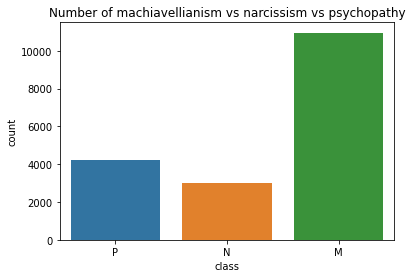

In [ ]:
sns.countplot(x='class', data=df)
plt.title('Number of machiavellianism vs narcissism vs psychopathy')
plt.show()

In [ ]:
machiavellianism = round((classes[0]/df['class'].count()*100),2)
machiavellianism

60.24

In [ ]:
psychopathy = round((classes[1]/df['class'].count()*100),2)
psychopathy

23.3

In [ ]:
narcissism = round((classes[2]/df['class'].count()*100),2)
narcissism

16.47

Text(0.5, 1.0, 'Percentage of Personality')

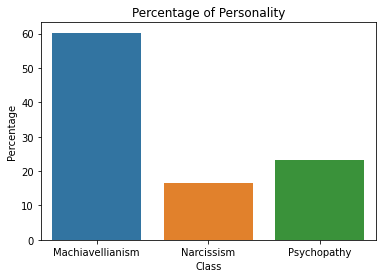

In [ ]:
percentage_of_personality = {'Class':['Machiavellianism','Narcissism','Psychopathy'],'Percentage':[machiavellianism,narcissism,psychopathy]}
df_percentage_of_personality = pd.DataFrame(percentage_of_personality)
sns.barplot(x='Class',y='Percentage',data=df_percentage_of_personality)
plt.title('Percentage of Personality')

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['class']= label_encoder.fit_transform(df['class'])
df

,M1,M2,M3,M4,M5,M6,M7,M8,M9,N1,...,P1,P2,P3,P4,P5,P6,P7,P8,P9,class
0,4,4,4,4,4,4,4,3,4,2,...,3,4,3,2,4,4,4,4,4,2
1,2,1,5,2,2,1,2,2,3,1,...,1,1,1,5,4,1,5,3,2,1
2,3,3,3,5,1,1,5,5,3,2,...,3,5,3,1,3,1,2,3,1,0
3,5,5,4,5,5,5,5,5,5,5,...,5,1,5,2,5,5,5,1,5,0
4,4,4,2,5,5,5,4,1,4,3,...,4,5,3,1,4,3,5,4,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18187,1,5,2,4,4,5,4,3,5,4,...,3,3,3,3,5,3,2,3,3,0
18188,5,4,5,4,5,4,5,4,5,4,...,3,2,2,1,5,2,2,3,4,0
18189,4,3,3,4,2,3,4,3,4,3,...,2,5,3,1,1,1,2,4,1,0
18190,5,4,3,3,4,4,4,3,4,3,...,4,3,3,4,4,3,4,1,3,0


In [ ]:
df['class'].describe

<bound method NDFrame.describe of 0        2
1        1
2        0
3        0
4        2
        ..
18187    0
18188    0
18189    0
18190    0
18191    0
Name: class, Length: 18192, dtype: int64>

### Train-Test Split

In [ ]:
x = df.drop("class",axis=1)
y = df["class"]

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2,random_state=42)


In [ ]:
x.head()

,M1,M2,M3,M4,M5,M6,M7,M8,M9,N1,...,N9,P1,P2,P3,P4,P5,P6,P7,P8,P9
0,4,4,4,4,4,4,4,3,4,2,...,4,3,4,3,2,4,4,4,4,4
1,2,1,5,2,2,1,2,2,3,1,...,2,1,1,1,5,4,1,5,3,2
2,3,3,3,5,1,1,5,5,3,2,...,5,3,5,3,1,3,1,2,3,1
3,5,5,4,5,5,5,5,5,5,5,...,5,5,1,5,2,5,5,5,1,5
4,4,4,2,5,5,5,4,1,4,3,...,5,4,5,3,1,4,3,5,4,1


In [ ]:
y.head()

0    2
1    1
2    0
3    0
4    2
Name: class, dtype: int64

### Model building

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='lbfgs', max_iter=1000)
LR.fit(xtrain,ytrain)
y_pred = LR.predict(xtest)

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(ytest, y_pred)
cnf_matrix

array([[2147,    0,    0],
       [   0,  635,    0],
       [   0,    0,  857]])

In [ ]:
score = LR.score(xtest, ytest)
print('Test Accuracy Score', score)

Test Accuracy Score 1.0


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2147
           1       1.00      1.00      1.00       635
           2       1.00      1.00      1.00       857

    accuracy                           1.00      3639
   macro avg       1.00      1.00      1.00      3639
weighted avg       1.00      1.00      1.00      3639



### Logistic Regrassion From Scratch 

In [ ]:
def multiplication(matA,matB):
  matrix = np.zeros(len(matA)*len(matB[0])).reshape(len(matA),len(matB[0]))
  # iterate through rows of r1
  for x in range(len(matA)):
      # iterate through columns of c2
      for y in range(len(matB[0])):
          # iterate through rows of r2
          for z in range(len(matA[0])):
              matrix[x][y] += matA[x][z] * matB[z][y]
  return matrix

In [ ]:
def transpose(matrix):
  mat_trans = np.zeros(len(matrix)*len(matrix[0])).reshape(len(matrix[0]),len(matrix))
  for j in range(len(matrix)):
    for i in range(len(matrix[0])):
      mat_trans[i][j] = matrix[j][i]
  return mat_trans